In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import path

We are checking how the number of bucekts affect the runtime. We keep other parameters at default.

In [3]:
# A function which can sort dataframes in a list of a dataframes. Based on bubble sort.
def sort_dataframe(dataframes: list, key: str):
    swapped = True
    while (swapped):
        swapped = False
        for i in range(len(dataframes)-1):
            # dataframes[i] gives us the ith dataframe, dataframes[i][key] gives us the right column and 
            # dataframes[i][key][0] gives us the first element of that column. We can do this because 
            # key should be equal for the whole column.
            a = dataframes[i][key][0]
            b = dataframes[i+1][key][0]
            if a > b:
                temp = dataframes[i]
                dataframes[i] = dataframes[i+1]
                dataframes[i+1] = temp
                swapped = True

In [4]:
# We load data
buckets_files = glob.glob(path.join("..", "cpp", "uni-machine", "v0.1.12", "buckets", "*.csv"))
dfs_buckets = [pd.read_csv(f) for f in buckets_files]

In [5]:
# We sort the data
sort_dataframe(dfs_buckets, "buckets")

In [6]:
# We calculate runtime per integer
for df in dfs_buckets:
    df["runtime/integer [ns]"] = df["total_runtime"] / (df["total_runs"] * df["integers"])

Text(0.5, 1.0, 'Comapring cip_shuffle buckets')

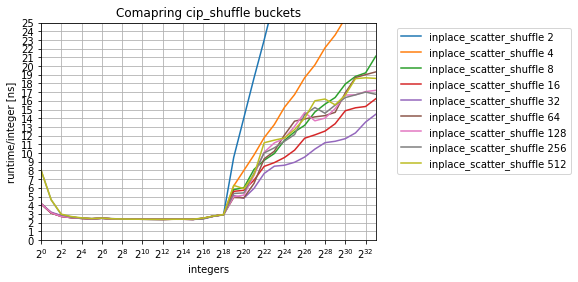

In [18]:
# We plot data
ax_xticks = [2 ** i for i in range(0, 34, 2)]
ax_yticks = [1 * i for i in range(0, 50, 1)]

ax = dfs_buckets[0].plot(x="integers", y="runtime/integer [ns]", label=dfs_buckets[0]["function"][0] + " " + str(dfs_buckets[0]["buckets"][0]))
for i in range(1, len(dfs_buckets)-1):
    dfs_buckets[i].plot(ax=ax, x="integers", y="runtime/integer [ns]", label=dfs_buckets[i]["function"][0] + " " + str(dfs_buckets[i]["buckets"][0]))

ax.set_xscale("log", base=2)
#ax.set_yscale("log", base=10)
ax.set_xticks(ax_xticks)
ax.set_yticks(ax_yticks)
ax.set_xlim(2**0, 2**33)
ax.set_ylim(0, 25)
ax.grid(True)
ax.set_xlabel("integers")
ax.set_ylabel("runtime/integer [ns]")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.set_title("Comapring cip_shuffle buckets")

Lools like 32 is the way to go!